In [1]:
# EURUSD Analysis

In [2]:
# Libraries 
import MetaTrader5 as mt5
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

In [3]:
# Connect to MetaTrader5 as mt5
mt5.initialize()

True

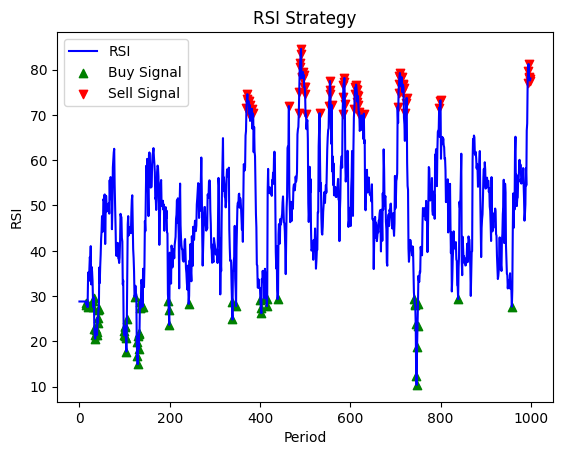

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the symbol and timeframe
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_H1

# Retrieve historical data
bars = 1000
rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, bars)

# Extract the close prices from the historical data
close_prices = pd.DataFrame(rates)['close']

# Define the RSI period
rsi_period = 14

# Calculate the RSI manually
delta = np.diff(close_prices)
gain = delta.copy()
loss = delta.copy()
gain[gain < 0] = 0
loss[loss > 0] = 0
average_gain = np.mean(gain[:rsi_period])
average_loss = np.abs(np.mean(loss[:rsi_period]))
rs = average_gain / average_loss
rsi = np.zeros_like(close_prices)
rsi[:rsi_period] = 100.0 - (100.0 / (1.0 + rs))

# Iterate over the RSI values
buy_signals = []
sell_signals = []
for i in range(rsi_period, len(close_prices)):
    current_price = close_prices[i]
    current_gain = max(0, current_price - close_prices[i - 1])
    current_loss = abs(min(0, current_price - close_prices[i - 1]))
    average_gain = (average_gain * (rsi_period - 1) + current_gain) / rsi_period
    average_loss = (average_loss * (rsi_period - 1) + current_loss) / rsi_period
    rs = average_gain / average_loss
    current_rsi = 100.0 - (100.0 / (1.0 + rs))
    rsi[i] = current_rsi

    # Check for a buy signal
    if current_rsi < 30:
        buy_signals.append(i)

    # Check for a sell signal
    if current_rsi > 70:
        sell_signals.append(i)

# Plotting the RSI values
plt.plot(rsi, color='blue', label='RSI')

# Plotting the buy and sell signals
plt.scatter(buy_signals, [rsi[i] for i in buy_signals],
            color='green', marker='^', label='Buy Signal')
plt.scatter(sell_signals, [rsi[i] for i in sell_signals],
            color='red', marker='v', label='Sell Signal')

plt.xlabel('Period')
plt.ylabel('RSI')
plt.title('RSI Strategy')
plt.legend()
plt.show()

In [9]:
# Define the RSI period and thresholds
rsi_period = 14
overbought_threshold = 70
oversold_threshold = 30

# Initialize variables
position = 0  # 0: no position, 1: long position, -1: short position
entry_price = 0
benefits = 0

# Calculate the RSI manually
delta = np.diff(close_prices)
gain = delta.copy()
loss = delta.copy()
gain[gain < 0] = 0
loss[loss > 0] = 0

average_gain = np.mean(gain[:rsi_period])
average_loss = np.abs(np.mean(loss[:rsi_period]))

for i in range(rsi_period, len(close_prices)):
    current_price = close_prices[i]
    current_gain = max(0, current_price - close_prices[i - 1])
    current_loss = abs(min(0, current_price - close_prices[i - 1]))

    average_gain = (average_gain * (rsi_period - 1) + current_gain) / rsi_period
    average_loss = (average_loss * (rsi_period - 1) + current_loss) / rsi_period

    rs = average_gain / average_loss
    current_rsi = 100.0 - (100.0 / (1.0 + rs))

    # Check for a buy signal
    if current_rsi < oversold_threshold and position != 1:
        if position == -1:
            # Close the existing short position
            benefits += entry_price - current_price
        # Open a long position
        position = 1
        entry_price = current_price

    # Check for a sell signal
    elif current_rsi > overbought_threshold and position != -1:
        if position == 1:
            # Close the existing long position
            benefits += current_price - entry_price
        # Open a short position
        position = -1
        entry_price = current_price

# Display the benefits
print("Total benefits:", benefits)

Total benefits: -0.013399999999999856
